In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import solve_ivp
from matplotlib import patches
from matplotlib import animation
from IPython.display import display, clear_output, HTML
from tqdm.notebook import tqdm

from kjm2601 import obsidian_media_path as path

%matplotlib inline

In [24]:
q,p = sp.symbols('q p')

#name = 'double_well'
name = 'harmonic_oscillator'


if name == 'double_well':

    V = -1/(q**2 + .24) - 2/((q-2)**2 + .3)

    q0 = 1
    p0 = 0.5
    y0 = [q0, p0]
    t0 = 0
    t1 = 10
    t = np.linspace(t0, t1, 400)

elif name == 'harmonic_oscillator':
    V = q**2/2

    q0 = 1
    p0 = 0.5
    y0 = [q0, p0]
    t0 = 0
    t1 = 10
    t = np.linspace(t0, t1, 400)



In [25]:
T = p**2/2
H = T + V
dHdq = sp.lambdify((q,p), sp.diff(H,q))
dHdp = sp.lambdify((q,p), sp.diff(H,p))
T_func = sp.lambdify(p, T)
V_func = sp.lambdify(q, V)


def odefun(t,y):
    q,p = y
    dqdt = dHdp(q,p)
    dpdt = -dHdq(q,p)
    return np.array([dqdt,dpdt])


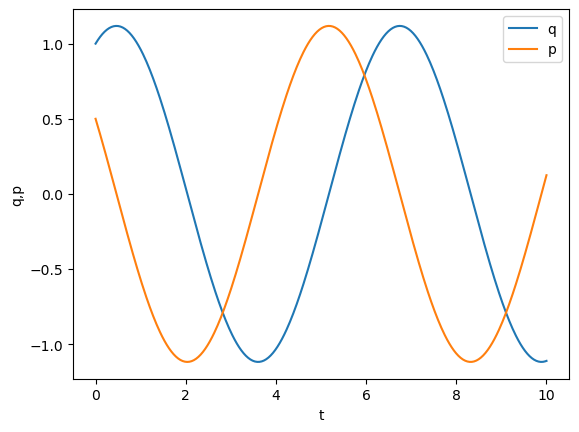

In [26]:

sol = solve_ivp(odefun, [t0, t1], y0, t_eval=t, method='DOP853', rtol=1e-10, atol=1e-10)
plt.plot(sol.t, sol.y[0], label='q')
plt.plot(sol.t, sol.y[1], label='p')
plt.xlabel('t')
plt.ylabel('q,p')
plt.legend()
plt.show()


  0%|          | 0/400 [00:00<?, ?it/s]

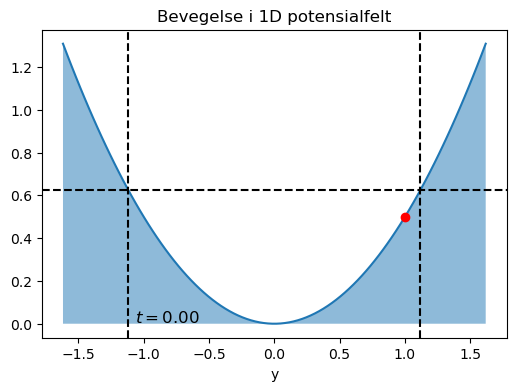

In [27]:
fig = plt.figure(figsize=(6,4))
x = np.linspace(np.min(sol.y[0])-.5,np.max(sol.y[0])+.5,100)

progress = tqdm(total=len(sol.t))



def animate(n):
    plt.clf()
    plt.fill_between(x, V_func(x), alpha=0.5)
    plt.plot(x, V_func(x), label='V(q)')

    

    plt.axvline(np.max(sol.y[0]), color='k', linestyle='--')
    plt.axvline(np.min(sol.y[0]), color='k', linestyle='--')
    plt.xlabel('y')
    plt.axhline(T_func(p0) + V_func(q0), color='k', linestyle='--')
    # place text in bottom left corner, using absolute coordinates
    plt.text(0.2, 0.05, f'$t={sol.t[n]:.2f}$', fontsize=12, ha='left', transform=plt.gca().transAxes)
    plt.title('Bevegelse i 1D potensialfelt')

    qq = sol.y[0][n]
    plt.plot(qq, V_func(qq), 'ro')
    progress.update(1)
    
anim = animation.FuncAnimation(fig, animate, frames=len(sol.t), interval=1, repeat=False)

#anim.save('potential_energy.mov')
#plt.show()

#HTML(anim.to_html5_video())
anim.save(path + 'classical_' + name + '.mp4', writer='ffmpeg', fps=30)



